In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [23]:
# 1. 데이터 준비
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

# print( diabetes.keys() ) # diabetes에 포함된 정보의 종류
# print( diabetes['DESCR'] )
# print( diabetes["feature_names"] )
# print( diabetes['target'] )

X = diabetes["data"]
y = diabetes["target"]

# 2. 훈련 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # 훈련 / 테스트 분할
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(331, 10) (331,) (111, 10) (111,)


In [17]:
# KNN 모델 훈련(학습)
from sklearn.neighbors import KNeighborsRegressor # 예측하려는 값이 수치형이므로 Regression 모델 사용

# 이웃 갯수를 변경하면서 모델을 만들고 테스트
scores = []
for n in np.arange(1, 10, 2): # 1, 3, 5, 7, 9 : 이웃 갯수
    knn = KNeighborsRegressor(n_neighbors=n)

    knn.fit(X_train, y_train) # 훈련

    train_score = knn.score(X_train, y_train) # 훈련데이터로 모델 평가
    test_score = knn.score(X_test, y_test) # 테스트데이터로 모델 평가

    # print(n, ":", train_score, test_score)
    scores.append((n, train_score, test_score))


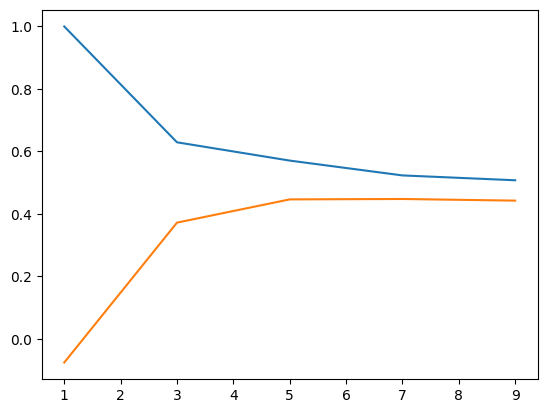

In [20]:
scores_df = pd.DataFrame(scores, columns=['이웃갯수', '훈련점수', "테스트점수"])
# print( scores_df )

plt.plot(scores_df["이웃갯수"], scores_df["훈련점수"])
plt.plot(scores_df["이웃갯수"], scores_df["테스트점수"])
plt.show()

In [22]:
# 다양한 평가 지표를 사용해서 모델 검토
from sklearn.metrics import mean_absolute_error, mean_squared_error

test_predicted_y = knn.predict(X_test)
train_predicted_y = knn.predict(X_train)

print( np.mean(y), np.std(y) )
mean_absolute_error(y_train, train_predicted_y), mean_absolute_error(y_test, test_predicted_y)

152.13348416289594 77.00574586945044


(43.61933534743203, 43.7017017017017)

In [40]:
# 데이터 준비
from turtle import st
from sklearn.datasets import load_iris

iris = load_iris()

X = iris['data']
y = iris['target']

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, stratify=y) # stratify=y : y분포를 훈련 및 테스트에서도 유지

X_train.shape, X_test.shape

((112, 4), (38, 4))

In [43]:
# KNN 분류 모델
from sklearn.neighbors import KNeighborsClassifier

scores = []
for n in np.arange(1, 10):
    knn = KNeighborsClassifier(n_neighbors=n)

    knn.fit(X_train, y_train)

    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    scores.append((n, train_score, test_score))

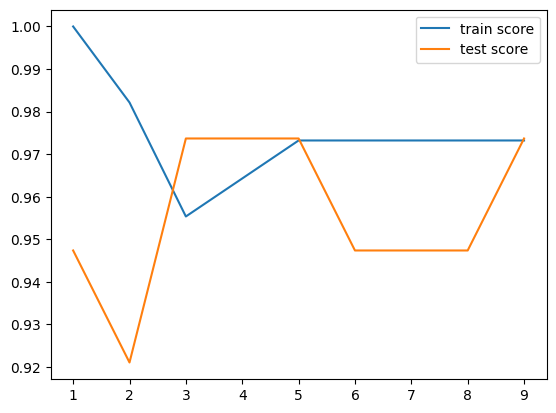

In [44]:
# 평가 결과 시각화

from cProfile import label


scores_df = pd.DataFrame(scores, columns=['이웃갯수', '훈련점수', "테스트점수"])
# print( scores_df )

plt.plot(scores_df["이웃갯수"], scores_df["훈련점수"], label="train score")
plt.plot(scores_df["이웃갯수"], scores_df["테스트점수"], label="test score")
plt.legend()
plt.show()

In [46]:
# 전체 데이터로 훈련
knn_best = KNeighborsClassifier(n_neighbors=3)
knn_best.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [50]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [56]:
# 모델 사용
while True:
    data = input("붓꽃 속성 입력 (종료는 q)")
    if data == 'q':
        break
    
    values = data.split(", ")
    values = list( map(lambda v: float(v), values) )

    species = knn_best.predict([values])
    print( iris["target_names"][species] )

['setosa']
['setosa']


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])